#The experimental XPCS data are fitted with ISF using lmfit Model

:0: FutureWarning: IPython widgets are experimental and may change in the future.


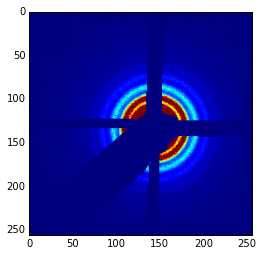

In [1]:
import skxray.core.roi as roi
import skxray.core.correlation as corr
import skxray.core.utils as core

from lmfit import minimize, Parameters, Model

import numpy as np
import os, sys

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm

data_dir = "/Volumes/Data/BeamLines/CHX/Luxi_description_files_for_duke/duke_cc_12C/"
duke_ndata = np.load(data_dir+"duke_img_1_5000.npy")
duke_dark = np.load(data_dir+"duke_dark.npy")

duke_data = []
for i in range(duke_ndata.shape[0]):
    duke_data.append(duke_ndata[i] - duke_dark)
    
duke_data=np.asarray(duke_data)

avg_img = np.average(duke_data, axis=0)

mask4 = np.load("/Users/sameera/Desktop/XSVS/new_mask4.npy")
mask = np.load("/Users/sameera/Desktop/XSVS/Luxi_data/Luxi_duke_mask.npy")

N_mask = ~(mask + mask4)

plt.imshow(N_mask*avg_img, vmax=1e0)
plt.show()

#Make the rings and find the experimental auto correlation values

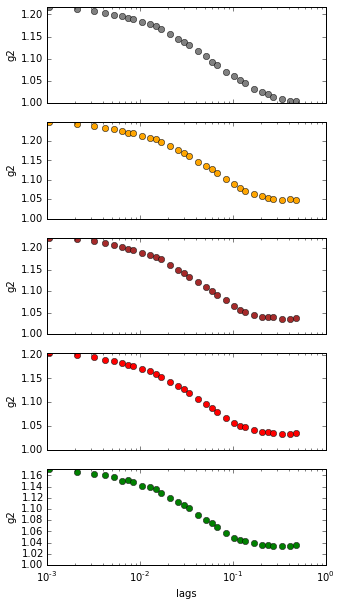

In [2]:
inner_radius = 24
width = 1
spacing = 0
num_rings = 5
center = (133, 143)

edges = roi.ring_edges(inner_radius, width, spacing, num_rings)

rings = roi.rings(edges, center, avg_img.shape)

mask_data2 = N_mask*duke_data[0:4999]

ring_mask = rings*N_mask

num_levels = 7
num_bufs = 8

g2, lag_steps = corr.multi_tau_auto_corr(num_levels, num_bufs, ring_mask,
                                             mask_data2)

exposuretime=0.001;
deadtime=60e-6;
timeperframe = exposuretime+deadtime
lags = lag_steps*timeperframe

roi_names = ['gray', 'orange', 'brown', 'red', 'green', 'blue', 'black',
             'purple', 'pink', 'yellow']


fig, axes = plt.subplots(num_rings, sharex=True, figsize=(5,10))
axes[num_rings-1].set_xlabel("lags")
for i, roi_color in zip(range(num_rings), roi_names):
    axes[i].set_ylabel("g2") 
    axes[i].semilogx(lags, g2[:, i], 'o', markerfacecolor=roi_color, markersize=6)
    axes[i].set_ylim(bottom=1, top=np.max(g2[1:, i]))
plt.show()

# convert to q

In [3]:
dpix =0.055

lambda_ = 1.5498  # wavelength
Ldet = 2200.   #   # distance to sample

edges

array([[ 24.,  25.],
       [ 25.,  26.],
       [ 26.,  27.],
       [ 27.,  28.],
       [ 28.,  29.]])

In [4]:
two_theta = core.radius_to_twotheta(Ldet, edges*dpix)
q_val = core.twotheta_to_q(two_theta, lambda_)

q_val

array([[ 0.00243251,  0.00253387],
       [ 0.00253387,  0.00263522],
       [ 0.00263522,  0.00273658],
       [ 0.00273658,  0.00283793],
       [ 0.00283793,  0.00293929]])

In [5]:
q_ring = np.mean(q_val, axis=1)

In [6]:
mod = Model(corr.auto_corr_scat_factor)

In [8]:
g2.shape

(32, 5)

#  Do the fitting

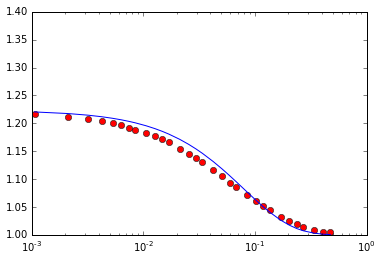

In [175]:
out = mod.eval(lags=lags, beta=0.2234, relaxation_rate = 6.2567,  baseline=1.0)
plt.semilogx(lags, g2[:, 0], 'ro')
plt.semilogx(lags, out, '-b')

In [127]:
# create a set of Parameters for first ring
params1 = Parameters()
params1.add('beta',  value=0.2345, min=0.189, max=0.325)
params1.add('relaxation_rate', value=6.78, min=6.57, max=6.897)
params1.add('baseline', value=1, min=0.93, max=1.5)

mod.set_param_hint('beta',value=0.2345, min=0.189, max=0.325)
mod.set_param_hint('relaxation_rate', value=6.78, min=6.57, max=6.897)
mod.set_param_hint('baseline', value=1)
pars = mod.make_params()
out_1 = mod.fit(lags=lags, pars=pars, beta=0.2215, relaxation_rate = 6.456,  baseline=1.0)

TypeError: fit() takes at least 2 arguments (1 given)

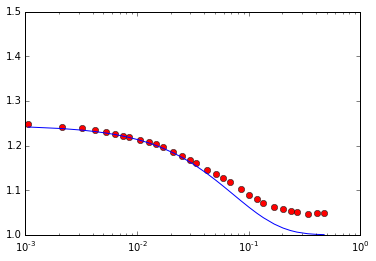

In [193]:
out1 = mod.eval(lags=lags, beta=0.24567, relaxation_rate =6.8456,  baseline=1.00034)
plt.semilogx(lags, g2[:, 1], 'ro')
plt.semilogx(lags, out1, '-b')

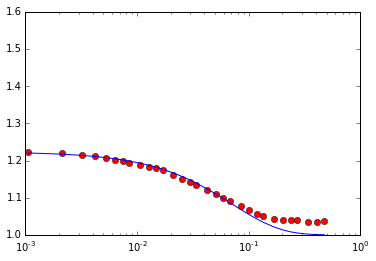

In [194]:
out2 = mod.eval(lags=lags, beta=0.2234, relaxation_rate=6.987,  baseline=1.0003)
plt.semilogx(lags, g2[:, 2], 'ro')
plt.semilogx(lags, out2, '-b')

In [ ]:
mod